<a href="https://colab.research.google.com/github/QuantWouter/CLASS_MA_CROSSOVER/blob/main/CLASS_MA_CROSSOVER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLASS MA_CROSSOVER

In [18]:
pip install yfinance

In [19]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
class MaCrossover:

  # Instantiate Objects
  def __init__(self,ticker, start, end, ma):
    self.ticker = ticker
    self.start = start
    self.end = end
    self.ma = ma


    # call methods which will follow below
    self.macrossover()


  # Actual Method all in one
  def macrossover(self):

    self.df = yf.download(self.ticker, self.start, self.end)

    self.df['pct_change'] = self.df['Close'].pct_change()

    self.df['ma'] = self.df['Close'].rolling(self.ma).mean()

    self.df['signal'] = np.where(self.df['ma']>self.df['Close'], 1, 0)

    self.df['signal'] = self.df['signal'].shift(1)

    self.df['result'] = self.df['pct_change'] * self.df['signal']

    self.df[['result', 'pct_change']].add(1).cumprod().plot(title=(f"result versus benchmark {self.ticker}"))




[*********************100%%**********************]  1 of 1 completed


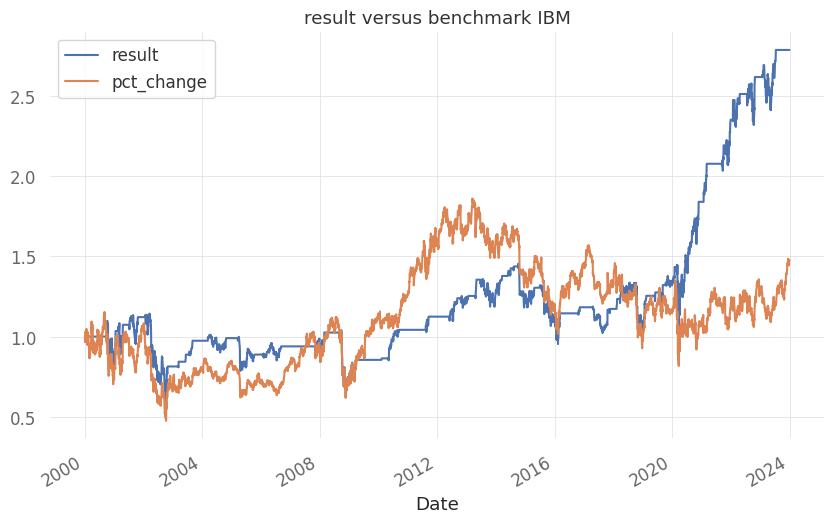

In [25]:
# Instantiate an Object
ibm_2000_2024_150 = MaCrossover("IBM",'2000-1-1','2024-1-1', 150)